# Diabetes Prediction

## Step 1 : 

    - Create and load Diabetes Dataset

    - Analyze the data ( shape and thier data types )

    - Check and verify there is null or missing value in Dataset

In [1]:
import pandas as pd 

df = pd.read_csv("public/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Print the shape of the dataset

print("Shapes :" , df.shape)

# information about datasets

print("Info :" , df.info())

# Need to know statistics about all columns , you can retrive info about specific column also

print(df.describe())

Shapes : (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Info : None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.5364

### I need to check are there any missing vlue or not in any columns

In [4]:
print(df.isnull().sum())

# There are no any missing value 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# It gives you how many pepole have dibaties and how many dont , 
# with the help of normalize=True it is giving percentag/propgation insted of raw count

df['Outcome'].value_counts(normalize=True) 

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

### Check for unrealistic zero values in key columns , These features should not be zero in real life

In [13]:
cols = ["Glucose" , "BloodPressure",	"SkinThickness",	"Insulin",	"BMI"]


# Count zeros in each column : Tells you how many zero values exist in each column.
df[cols].isin([0]).sum()

# Find rows where any column has zero : Shows the actual rows that contain at least one unrealistic zero.
# df[df[col].isin([0]).any(axis=1)]

# Check zero for one specific column : Helps you focus on one column at a time.
# df[df["Glucose"] == 0]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### zero as missing and replace them with median values

In [15]:
for c in cols:
    median_val = df[c].median()
    df[c] = df[c].replace(0 , median_val)


# After replacing values 

df[cols].isin([0]).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

### Now we have to make our model learn

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Input feature and output target

X = df[["Pregnancies","Glucose","BloodPressure"	, "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]


y = df["Outcome"]

# Split the dataset
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

# Scaling
scale = StandardScaler()

# Fit scaler on training features
scale.fit(X_train)

# Scale inout and test data
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

# model
model = LogisticRegression()

# fit the data
model.fit(X_train_scale , y_train)

# Prediction

prediction = model.predict(X_test_scale)

# Model evaluation

# Accuracy
acc = accuracy_score(y_test, prediction)

# Precision
prec = precision_score(y_test, prediction)

# Recall
rec = recall_score(y_test, prediction)

# F1 Score
f1 = f1_score(y_test, prediction)

# Confusion Matrix
cm = confusion_matrix(y_test, prediction)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7445887445887446
Precision: 0.64
Recall: 0.6
F1 Score: 0.6193548387096774
Confusion Matrix:
 [[124  27]
 [ 32  48]]


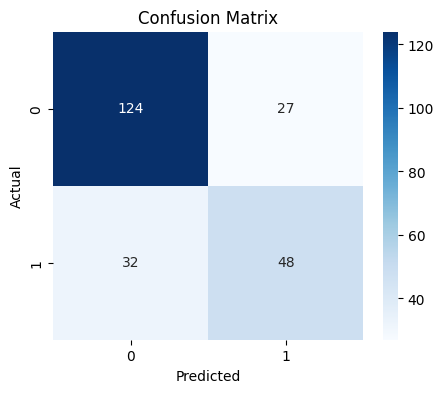

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
